In [35]:
# import os
import cv2
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
# from keras.applications.vgg16 import preprocess_input

In [36]:

def feature_cnn(input_shape_spectrogram, num_classes):


    model=Sequential([
        Conv2D(32,kernel_size=(3, 3), activation='relu',input_shape=(128,128,1)),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64,kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(128,kernel_size=(3, 3), activation='relu', name='last_conv_layer'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128,activation='relu'),
        Dropout(0.5),
        Dense(num_classes,activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [37]:
def load_spectrogram_images(image_paths):
    images = []
    for path in image_paths:
        img = load_img(path, color_mode='grayscale', target_size=(128, 128))  # Adjust target_size as needed
        img = img_to_array(img)
        images.append(img)
    return np.array(images)

In [66]:
features = pd.read_csv('audio_feature_file.csv')
image_paths = ['.\\melspectrogram\\' + os.path.basename(fname).replace('.wav', '.png') for fname in features['audio_path']]
spectrogram_images = load_spectrogram_images(image_paths)
print(type(spectrogram_images))

<class 'numpy.ndarray'>


In [39]:
print(features['target'])
label_mapping = {0 : "Artifact",
                     1 : "Extra HS",
                     2 : "Extrasystol",
                     3 : "Murmur",
                     4 : "Normal"}

# Convert integer labels to string labels using the mapping
target = [label_mapping[label] for label in features['target']]
print(len(target))  
print(target)


0       1
1       4
2       3
3       0
4       3
       ..
1436    4
1437    4
1438    4
1439    4
1440    4
Name: target, Length: 1441, dtype: int64
1441
['Extra HS', 'Normal', 'Murmur', 'Artifact', 'Murmur', 'Normal', 'Normal', 'Normal', 'Normal', 'Murmur', 'Murmur', 'Artifact', 'Normal', 'Murmur', 'Artifact', 'Normal', 'Normal', 'Murmur', 'Murmur', 'Normal', 'Normal', 'Normal', 'Normal', 'Murmur', 'Normal', 'Normal', 'Normal', 'Extrasystol', 'Artifact', 'Murmur', 'Normal', 'Normal', 'Normal', 'Normal', 'Murmur', 'Normal', 'Artifact', 'Murmur', 'Normal', 'Artifact', 'Normal', 'Normal', 'Extrasystol', 'Murmur', 'Normal', 'Normal', 'Artifact', 'Murmur', 'Normal', 'Normal', 'Murmur', 'Murmur', 'Normal', 'Murmur', 'Murmur', 'Normal', 'Extrasystol', 'Normal', 'Normal', 'Artifact', 'Murmur', 'Normal', 'Normal', 'Murmur', 'Normal', 'Extra HS', 'Normal', 'Artifact', 'Normal', 'Normal', 'Murmur', 'Normal', 'Murmur', 'Artifact', 'Murmur', 'Normal', 'Normal', 'Extrasystol', 'Normal', 'Normal',

In [40]:
# drop the target feature and replace the feature['target'] with the new target
features = features.drop(columns=['target'])
features['target'] = target
num_classes = len(np.unique(features["target"]))

In [41]:
features.head()

,Unnamed: 0,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfccs_coef1,mfccs_coef2,mfccs_coef3,...,mfccs_coef35,mfccs_coef36,mfccs_coef37,mfccs_coef38,mfccs_coef39,mfccs_coef20.1,tempo,audio_path,offset,target
0,0,1.061371,-1.013109,3.825133,2.928648,3.940776,4.589701,-2.736617,-2.579830,-0.666836,...,-0.741407,0.625335,0.145355,-0.230525,0.413109,-0.130867,-0.050135,.\Data\set_a\extrahls__201101152255.wav,2.513084,Extra HS
1,1,0.551917,-0.646058,-0.417203,-0.555994,-0.422605,0.294182,-0.020146,-0.193283,0.897992,...,0.916711,-0.956518,-0.938441,0.748576,-0.268280,0.027718,0.373084,.\Data\set_b\normal_noisynormal_146_1306778707...,6.485000,Normal
2,2,-0.070558,-0.691344,-0.394320,-0.557677,-0.396275,-0.124126,0.116556,0.115279,-0.633517,...,0.411128,-0.817138,-0.335236,0.050701,0.037244,0.637654,0.373084,.\Data\set_b\murmur_noisymurmur_240_1309201366...,0.963375,Murmur
3,3,-1.039702,3.019173,1.451166,1.949525,1.733853,-0.366618,1.163076,-0.508560,-1.867428,...,0.091298,0.920142,0.442644,-0.346810,0.887595,0.160772,0.201197,.\Data\set_a\artifact__201106041452.wav,2.000000,Artifact
4,4,0.110646,3.401878,-0.417174,-0.596504,-0.426077,-0.273807,1.630042,1.506608,-1.511910,...,-0.508508,-0.268189,-0.844573,-0.951080,0.160356,-0.469469,0.373084,.\Data\set_b\murmur__160_1307100683334_B.wav,8.980125,Murmur


In [42]:
y = features['target']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)
print("targert : ",y.shape)

targert :  (1441, 5)


In [43]:
X = spectrogram_images
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
print("x_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (1152, 128, 128, 1)
y_train shape: (1152, 5)


In [44]:
model = feature_cnn(X_train.shape, num_classes)

# Display the model summary
model.summary()

c:\Users\omamm\Documents\mini project\environment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv_layer (Conv2D)        │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,709 (12.61 MB)

 Trainable params: 3,304,709 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(X_train, y_train, validation_data=( X_test, y_test), epochs=50, batch_size=16)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.4345 - loss: 17.5521 - val_accuracy: 0.6228 - val_loss: 0.9114
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.6135 - loss: 0.9469 - val_accuracy: 0.6540 - val_loss: 0.8203
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 116s 814ms/step - accuracy: 0.6293 - loss: 0.8843 - val_accuracy: 0.6886 - val_loss: 0.7825
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6935 - loss: 0.7798 - val_accuracy: 0.7163 - val_loss: 0.7102
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1627s 23s/step - accuracy: 0.7235 - loss: 0.7452 - val_accuracy: 0.7474 - val_loss: 0.6551
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 62s 492ms/step - accuracy: 0.7778 - loss: 0.6034 - val_accuracy: 0.7716 - val_loss: 0.6140
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 34s 478ms/step - accuracy: 0.7675 - loss: 0.6179 - val_accuracy: 0.7405 - val_loss: 0.6254
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 478ms/step - accuracy: 0.7947 - loss: 0.5360 - val_accuracy: 

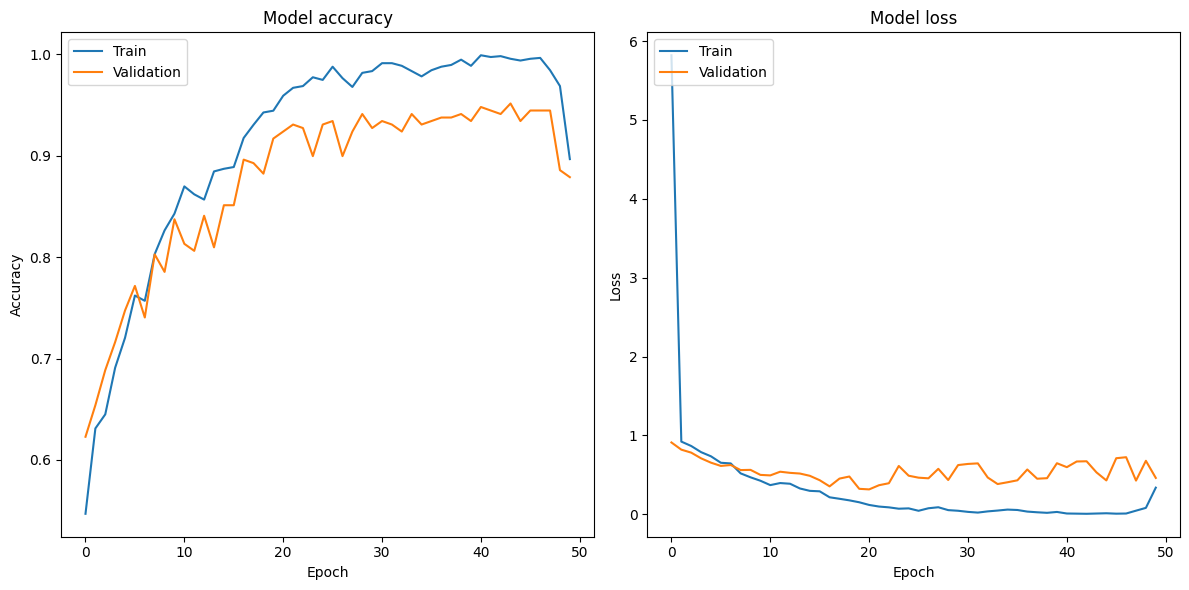

In [48]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [69]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print('Train loss:', train_loss)
print('Train accuracy:', train_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.8713 - loss: 0.4590
Test loss: 0.46188998222351074
Test accuracy: 0.878892719745636
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 349ms/step - accuracy: 0.9382 - loss: 0.2311
Train loss: 0.23938485980033875
Train accuracy: 0.9314236044883728


In [68]:

from sklearn.metrics import accuracy_score, precision_score, f1_score, hamming_loss

# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to binary (assuming multi-class one-hot encoded labels)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: ", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_binary, average='weighted')
print("Precision: ", precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary, average='weighted')
print("F1 Score: ", f1)

# Calculate Hamming Loss
hamming = hamming_loss(y_test, y_pred_binary)
print("Hamming Loss: ", hamming)


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 656ms/step
Accuracy:  0.8373702422145328
Precision:  0.8915871015047037
F1 Score:  0.8628034302184308
Hamming Loss:  0.05328719723183391


In [53]:
# model.save('heartbeat_feature_model.h5')
model.save('heartbeat_feature_model.keras')


In [ ]:
X_train.shape

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image

# Define the function to load and preprocess the image
def get_img_array(img_path, size):
    img = image.load_img(img_path, target_size=size, color_mode='grayscale')
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array / 255.0  # Ensure the array is in the range [0, 1]

# Function to generate the Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Function to display the Grad-CAM heatmap
def display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = image.load_img(img_path, color_mode='grayscale')
    img = image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)

    jet = plt.cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = image.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)

    img = plt.imread(cam_path)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

# Load the saved model
model = load_model('heartbeat_feature_model.keras')

# Load your audio file and convert it to a spectrogram image
# Assume you have a function that converts an audio file to a spectrogram image

# Call the model with a dummy input to define the output
_ = model.predict(np.zeros((1,) + input_shape))

# Generate the Grad-CAM heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name='last_conv_layer')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


ValueError: The layer sequential_3 has never been called and thus has no defined output.